In [33]:
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [34]:
iris=datasets.load_iris()
X=iris['data'][:,(2,3)] # 取2，3两列作为特征
y=iris['target']
setosa_or_versicolor=(y==0)|(y==1) # SVM解决二分类问题，取两类即可 
X=X[setosa_or_versicolor]
y=y[setosa_or_versicolor]
# 创建svm模型
SVM_clf=SVC(kernel='linear',C=float('inf')) # 传入核函数类型和松弛因子 
SVM_clf.fit(X,y)

SVC(C=inf, kernel='linear')

In [35]:
# 一般的模型
x0=np.linspace(0,5.5,200)
pred1=5*x0-20
pred2=x0-1.8
pred3=0.1*x0+0.5  

(0.0, 5.5, 0.0, 2.0)

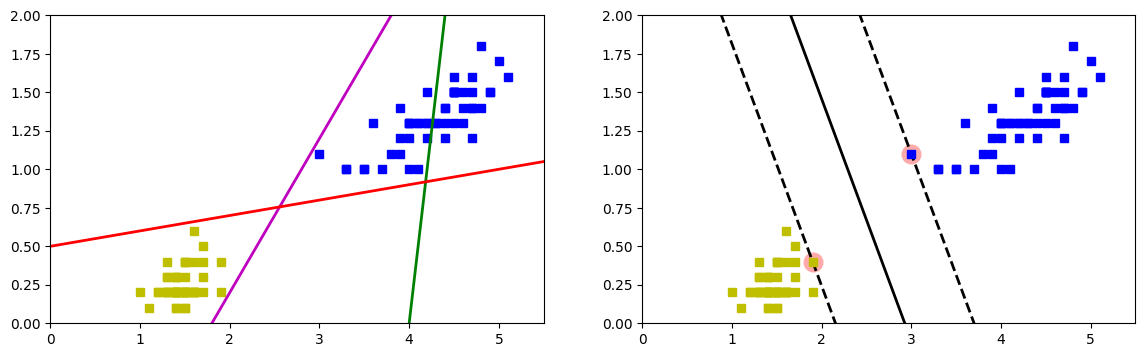

In [36]:
# 绘制决策边界
def plot_svc_desicion_boundary(svm_clf,xmin,xmax,sv=True):
    w=svm_clf.coef_[0]
    b=svm_clf.intercept_[0]
    x0=np.linspace(xmin,xmax,200)
    decision_boundary=-w[0]/w[1]*x0-b/w[1]
    margin=1/w[1] # 到决策边界的距离
    # 上、下边界
    gutter_up=decision_boundary+margin
    gutter_down=decision_boundary-margin
    # 要画出支持向量的情况
    if sv:
        svs=svm_clf.support_vectors_
        plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
    plt.plot(x0,decision_boundary,'k-',linewidth=2)
    plt.plot(x0,gutter_up,'k--',linewidth=2)
    plt.plot(x0,gutter_down,'k--',linewidth=2)
plt.figure(figsize=(14,4))
# 普通模型效果
plt.subplot(121) 
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.plot(x0,pred1,'g-',linewidth=2)
plt.plot(x0,pred2,'m-',linewidth=2)
plt.plot(x0,pred3,'r-',linewidth=2)
plt.axis([0,5.5,0,2])
# 支持向量机效果
plt.subplot(122)
plot_svc_desicion_boundary(SVM_clf,0,5.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.axis([0,5.5,0,2])

### 使用超参数C控制软间隔程度

In [40]:
X=iris['data'][:,(2,3)]
y=(iris['target']==2).astype(np.float64) # 取第二类
model=Pipeline((
    ('std',StandardScaler()),
    ('linear_svc',LinearSVC(C=1)) # 松弛因子设为1
))
model.fit(X,y)

Pipeline(steps=[('std', StandardScaler()), ('linear_svc', LinearSVC(C=1))])

### 非线性支持向量机

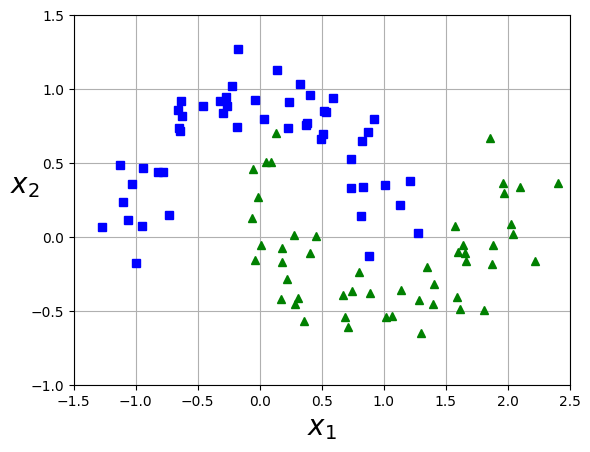

In [45]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
X,y=make_moons(n_samples=100,noise=0.15,random_state=42)
def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
    plt.axis(axes)
    plt.grid(True,which='both')
    plt.xlabel(r'$ x_1 $',fontsize=20)
    plt.ylabel(r'$ x_2 $',fontsize=20,rotation=0)

plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()

In [46]:
polynomial_svm_clf=Pipeline((
    ('poly_features',PolynomialFeatures(degree=3)), # 增加数据的非线性
    ('scaler',StandardScaler()),
    ('svc_clf',LinearSVC(C=10,loss='hinge'))
))
polynomial_svm_clf.fit(X,y)

d:\software\developtools\anaconda3\envs\deeplearning_env\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svc_clf', LinearSVC(C=10, loss='hinge'))])

### 绘制决策边界

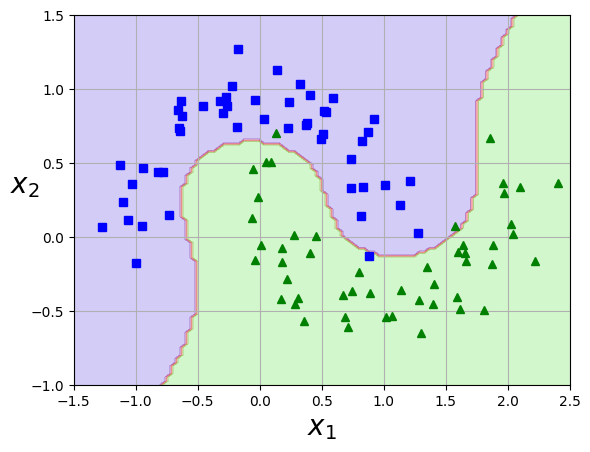

In [47]:
def plot_prediction(clf,axes):
    x0s=np.linspace(axes[0],axes[1],100)
    x1s=np.linspace(axes[2],axes[3],100)
    # 绘制棋盘
    x0,x1=np.meshgrid(x0s,x1s)
    X=np.c_[x0.ravel(),x1.ravel()]
    y_pred=clf.predict(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)

plot_prediction(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])